In [2]:
%matplotlib inline
import pylab
import numpy as np
import functools
import adapt_float
import adapt_spike
import adapt_fixed

import ctn_benchmark.control as ctrl

In [59]:
D = 1
dt=0.001
T = 10.0
seed=1
noise=0.1
Kp=2
Kd=1
Ki=0.1
tau_d=0.001
period=4
amplitude=3
n_neurons=500
learning_rate=1
max_freq=1.0
synapse=0.01
scale_add=2
delay=0.00
filter=0.00

n_neurons=256

signal = ctrl.Signal(D, period, dt=dt, max_freq=max_freq, seed=seed)

system = ctrl.System(D, D, dt=dt, seed=seed,
        motor_noise=noise, sense_noise=noise,
        scale_add=scale_add,
        motor_scale=10,
        motor_delay=delay, sensor_delay=delay,
        motor_filter=filter, sensor_filter=filter)

pid = ctrl.PID(Kp, Kd, Ki, tau_d=tau_d)

adapt = adapt_float.AdaptiveFloat(n_inputs=D, n_outputs=D, n_neurons=n_neurons, seed=seed,
                                 learning_rate=1e-3)


steps = int(T / dt)
time = np.arange(steps)*dt
data_desired = np.zeros((steps, D))
data_actual = np.zeros((steps, D))
data_pid = np.zeros((steps, D))
data_error = np.zeros((steps, D))

for i in range(steps):
    desired = signal.value(i*dt)*amplitude
    data_desired[i,:] = desired
    
    actual = system.state
    data_actual[i,:] = actual
    
    raw_pid = pid.step(actual, desired)
    data_pid[i,:] = raw_pid
    
    adjust = adapt.step(actual, -raw_pid)
    
    system.step(raw_pid + adjust)


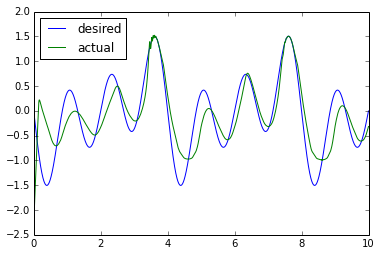

In [60]:

pylab.plot(time, data_desired, label='desired')
pylab.plot(time, data_actual, label='actual')
pylab.legend(loc='best')
pylab.show()